<a href="https://colab.research.google.com/github/Baduisef/R_Code-/blob/main/Segmentation_clients_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Définition :

La segmentation de clients est une stratégie marketing qui consiste à diviser une base de clients en groupes homogènes en fonction de certains critères, tels que les comportements d'achat, les caractéristiques démographiques, les préférences, etc. Cette approche permet aux entreprises de mieux comprendre leurs clients, de cibler leurs interactions et d'ajuster leurs stratégies de marketing en conséquence. Voici une approche générale pour effectuer la segmentation de clients :
Étapes de la Segmentation de Clients :
1. Définir l'Objectif de la Segmentation :

    Clarifiez l'objectif de la segmentation. Par exemple, voulons-nous cibler des groupes spécifiques pour des promotions, cibler les offres, ou fidéliser nos client ?

2. Collecte de Données :

    Rassemblez des données sur nos clients. Cela peut inclure des données démographiques, des historiques d'achats, des préférences, des données comportementales en ligne, etc.

3. Choisir les Critères de Segmentation :

    Identifier les critères de segmentation pertinents pour notre objectif. Par exemple :
        Socio-Démographiques : Âge, sexe, revenu, emplacement.
        Comportementaux : Fréquence d'achat, valeur moyenne des achats, canaux d'achat.
        Psychographiques : Mode de vie, valeurs, intérêts, personnalité, statut social...
        RFM (Récence, Fréquence, Montant) : Un modèle de segmentation basé sur le comportement d'achat.

4. Analyse des Données :

    Utiliser des techniques d'analyse de données pour identifier des groupes similaires. Les méthodes incluent les KMeans, l'analyse factorielle, et d'autres algorithmes d'apprentissage automatique.

5. Créer des Profils de Segmentation :

    Développer des profils détaillés pour chaque segment identifié. Comprendre les caractéristiques clés de chaque groupe.

6. Validation :

    Vérifier la validité des segments en utilisant des tests statistiques et en évaluant la pertinence des groupes formés.

7. Mise en Œuvre des Stratégies Spécifiques :

    Concevoir des stratégies marketing spécifiques pour chaque segment. Personnaliser nos communications, promotions et expériences en fonction des caractéristiques de chaque groupe.

8. Évaluation et Ajustement Continu :

    Surveiller l'efficacité de nos stratégies de segmentation. Les besoins et comportements des clients évoluent, et la segmentation doit être régulièrement revue et ajustée.


    Lien des données : https://archive.ics.uci.edu/dataset/292/wholesale+customers

In [ ]:
install.packages("skimr")
install.packages("factoextra")
install.packages("NbClust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘later’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



I.Importation des packages

In [ ]:
# Chargement des packages
library(tidyverse)
library(skimr)
library(factoextra)
library(NbClust)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



II- Importation  et exploration des données

In [ ]:
# Chargement des données
df <- read.csv("/content/Wholesale customers data.csv")
df%>%
  mutate(Channel=as.factor(Channel),
Region = as.factor(Region))%>%
  skim()

── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             440       
Number of columns          8         
_______________________              
Column type frequency:               
  factor                   2         
  numeric                  6         
________________________             
Group variables            None      

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts          
1 Channel               0             1 FALSE          2 1: 298, 2: 142      
2 Region                0             1 FALSE          3 3: 316, 1: 77, 2: 47

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable    n_missing complete_rate   mean     sd p0   p25   p50    p75
1 Fresh                    0             1 12000. 12647.  3 3128. 8504  16934.
2 Milk                 

ERROR: ignored

III. Préparation des données :

les histogrammes des variables continues montrons qu'elles ne sont pas normalement distribuées.
Normalisons les alors.  

La normalisation en statistique peut faire référence à différentes techniques selon le contexte, mais généralement, elle implique la transformation des données pour les rendre comparables ou pour les adapter à une certaine échelle. Dans notre cas nous transformons nos donnéees brutes de manière à ce qu'elles suivent la distribution normale (courbe en forme de cloche)

In [ ]:
df_cleaning <- df %>%
  select(-Region,-Channel)
df_cleaning %>%
  head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<int>,<int>,<int>,<int>,<int>,<int>
1,12669,9656,7561,214,2674,1338
2,7057,9810,9568,1762,3293,1776
3,6353,8808,7684,2405,3516,7844
4,13265,1196,4221,6404,507,1788
5,22615,5410,7198,3915,1777,5185
6,9413,8259,5126,666,1795,1451


In [ ]:
df_normal <-df_cleaning %>%
  mutate(across(everything(), ~ (.-mean(.))/sd(.)))

df_normal %>%
  head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.05287300,0.52297247,-0.04106815,-0.5886970,-0.04351919,-0.06626363
2,-0.39085706,0.54383861,0.17012470,-0.2698290,0.08630859,0.08904969
3,-0.44652098,0.40807319,-0.02812509,-0.1373793,0.13308016,2.24074190
4,0.09999758,-0.62331041,-0.39253008,0.6863630,-0.49802132,0.09330484
5,0.83928412,-0.05233688,-0.07926595,0.1736612,-0.23165413,1.29786952
6,-0.20457266,0.33368675,-0.29729863,-0.4955909,-0.22787885,-0.02619421


IV. Clutering avec KMean

Petit resumer de l'algorithme du K-mean:
Le K-means est un algorithme de regroupement (clustering) largement utilisé en machine learning et en statistiques. L'objectif principal de l'algorithme K-means est de diviser un ensemble de données en "k" groupes, appelés clusters, où chaque point de données appartient au cluster dont le centre (centroïde) est le plus proche.

l'algorithme se déroule en suivant les étapes suivants :    

1- Initialisation : Sélectionner aléatoirement k points de données comme centres initiaux des clusters, appelés centroïdes.

2- Affectation : Associer chaque point de données au centroïde le plus proche, créant ainsi k clusters.

3- Mise à jour : Recalculer les centroïdes de chaque cluster en prenant la moyenne des points de données qui lui sont attribués.

4- Répétez : Répéter les étapes d'affectation et de mise à jour jusqu'à ce qu'il n'y ait que peu ou pas de changement dans l'affectation des points de données aux clusters ou jusqu'à ce qu'un nombre prédéfini d'itérations soit atteint.

Le principe K-means est de minimiser la somme des carrés des distances entre chaque point de données et le centroïde de son cluster, ce qu'on appelle l'inertie du cluster.


K-means est largement utilisé dans divers domaines tels que la segmentation de la clientèle, la compression d'image, la biologie, l'analyse de données géospatiales, etc. Il convient à des ensembles de données où la structure en clusters est présente. Cependant, il a des limitations, notamment la sensibilité à la forme et à la taille des clusters, et ne fonctionne pas bien avec des clusters de formes complexes ou de tailles différentes.


IV.1. Détermination du nombre optimal de crusters

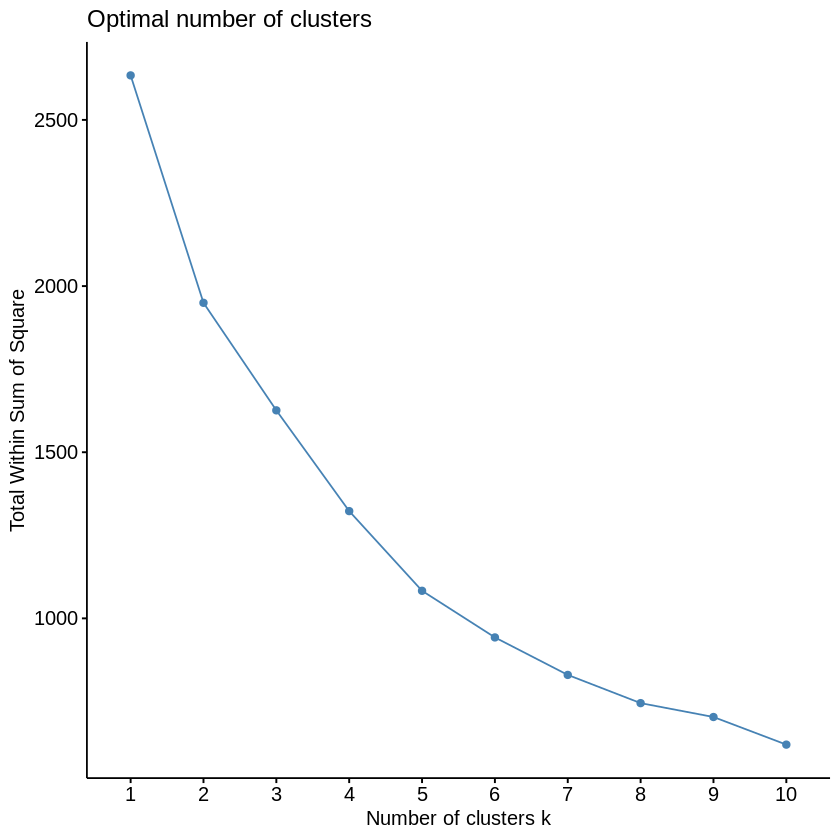

In [ ]:
# Determination du nombre de cluster initial
elbow_method <- df_normal %>%
  fviz_nbclust(
  FUNcluster= kmeans,
  method = "wss",
  )

elbow_method

Warning message in pf(beale, pp, df2):
“NaNs produced”


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


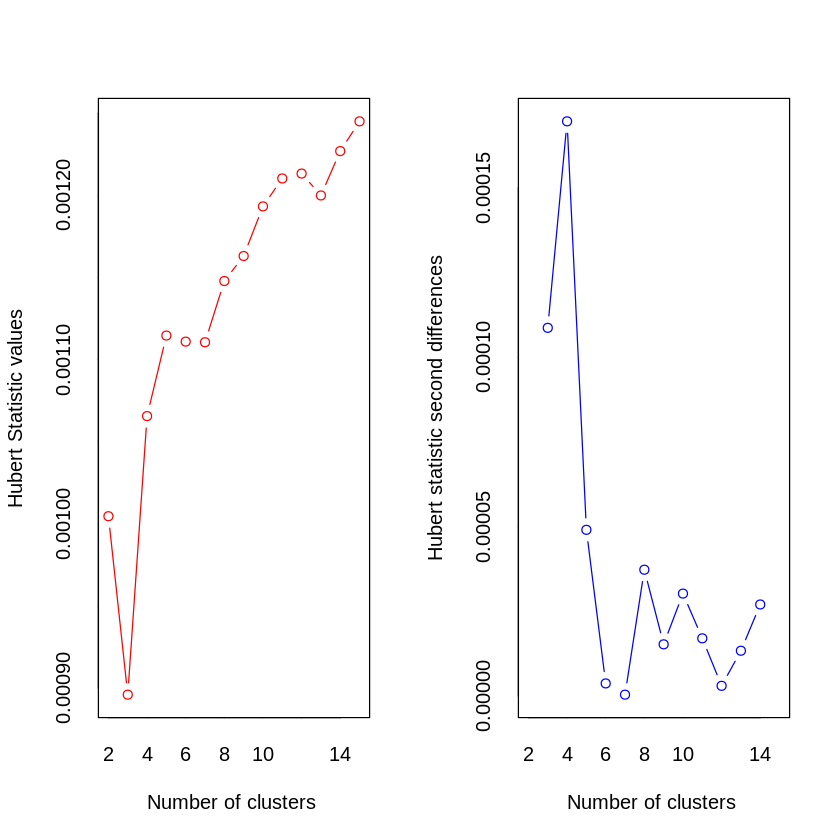

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 5 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 3 proposed 10 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 
* 2 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
**************************

,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,⋯,Ratkowsky,Ball,Ptbiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
2,1.9118,153.7581,83.0990,-5.7411,399.4428,3.903647e+14,126106.698,1949.6006,10.1879,1.3510,⋯,0.2924,974.8003,0.5718,3.0244,0.0910,0.0188,0.0010,10.7568,1.5469,2.4279
3,0.4337,132.7107,91.9362,-9.9801,717.4454,4.263575e+14,67363.943,1638.7001,11.8868,1.6074,⋯,0.3446,546.2334,0.5552,3.2303,0.2196,0.0223,0.0009,9.2638,1.4098,1.9988
4,6.7432,137.4171,40.7154,-7.6949,1139.4542,2.904791e+14,67531.370,1353.8722,17.0572,1.9455,⋯,0.3382,338.4680,0.4636,3.0130,0.4934,0.0135,0.0011,14.6934,1.2425,3.1107
5,0.0864,122.5843,124.3872,-8.7930,1333.0643,2.923044e+14,58988.209,1238.2405,18.4078,2.1272,⋯,0.3184,247.6481,0.4289,-14.7730,0.6383,0.0073,0.0011,18.8375,1.1901,3.8908
6,3.0024,150.6399,57.2647,0.4280,1839.9904,1.329980e+14,29689.494,962.9012,23.4134,2.7355,⋯,0.3217,160.4835,0.4388,0.8719,0.6047,0.0121,0.0011,7.4804,1.1426,1.2772
7,1.5322,151.2917,43.0914,3.0807,2095.7047,1.012372e+14,19584.023,850.6597,24.6330,3.0964,⋯,0.3098,121.5228,0.4303,3.1527,0.6965,0.0183,0.0011,7.2544,1.0703,1.3036
8,0.9456,148.3964,43.2568,4.6084,2293.9381,8.426773e+13,16275.405,773.6659,26.0438,3.4046,⋯,0.2964,96.7082,0.3728,-39.9243,1.0272,0.0161,0.0011,7.2097,1.0117,1.1739
9,0.4820,147.9125,76.2037,6.7954,2559.3300,5.834663e+13,14905.989,703.2485,29.1723,3.7455,⋯,0.2845,78.1387,0.3751,1.0102,1.0121,0.0204,0.0012,9.2437,1.0017,1.5218
10,5.6451,162.8123,24.8543,12.5146,2912.0928,3.231040e+13,10013.208,597.5906,32.1806,4.4077,⋯,0.2778,59.7591,0.3587,1.1109,1.1665,0.0204,0.0012,8.4101,0.9422,1.3763
11,5.2783,157.1199,14.7031,12.9891,3008.2367,3.142175e+13,9025.196,564.9369,32.6003,4.6625,⋯,0.2670,51.3579,0.3379,0.6225,1.3736,0.0183,0.0012,8.0750,0.9092,1.2691


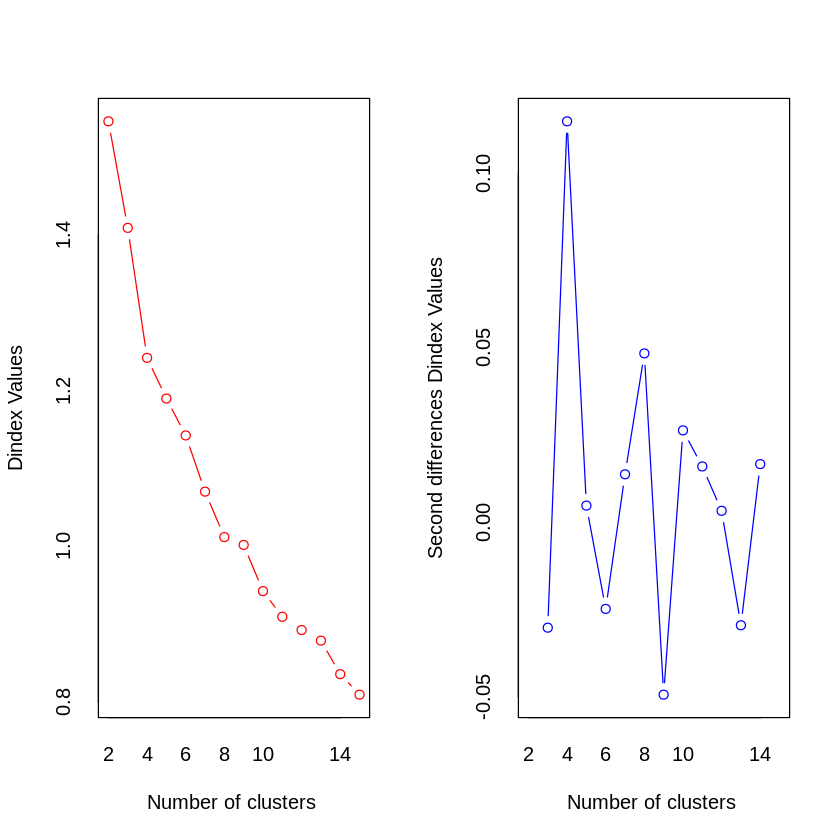

In [ ]:
df_normal %>%
  NbClust(
  distance = "euclidean",
  method = "kmeans"
  )

D'aprés la régle de la majorité, le nombre optimal de cluster est 2

IV.2 Entrainement du modèle

In [ ]:
set.seed(123)

model <- kmeans(df_normal,centers= 2, nstart = 60)
print(model)

K-means clustering with 2 clusters of sizes 41, 399

Cluster means:
        Fresh       Milk    Grocery      Frozen Detergents_Paper Delicassen
1  0.05283636  2.0659269  2.2407190  0.32219794        2.2585338  0.8039597
2 -0.00542930 -0.2122882 -0.2302493 -0.03310806       -0.2320799 -0.0826124

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 1 2 1 1 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
[149] 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 2 1 2 2 1 2 1 2 2 1 2 2 1 2 2 

IV.3 Visualisation des clusters

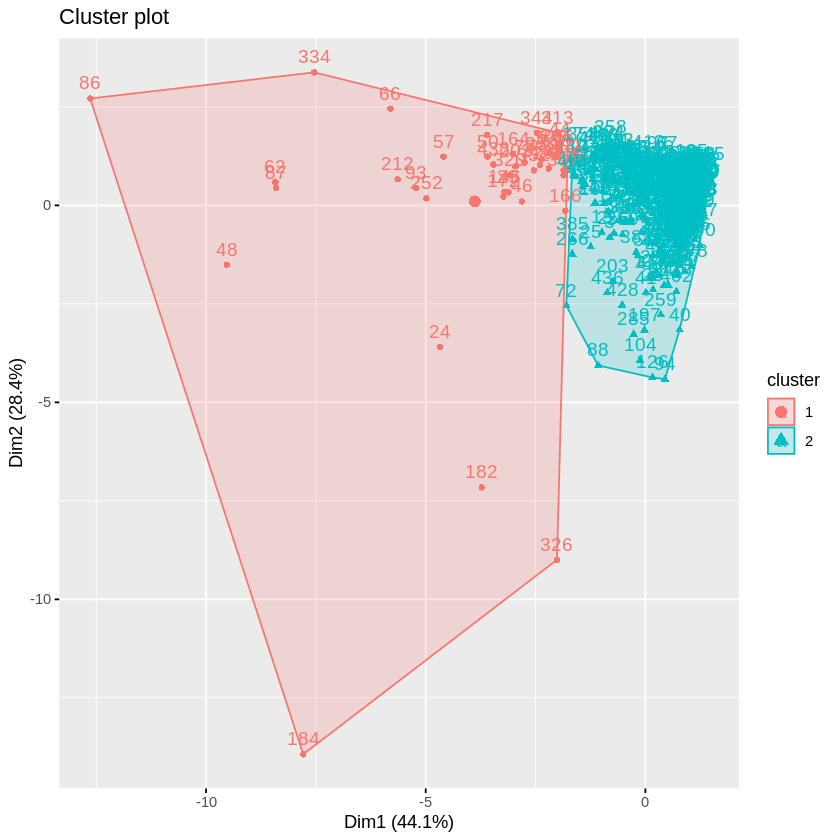

In [ ]:
fviz_cluster(model,data=df_normal)

IV.3 Evaluation de notre modèle

In [ ]:
df$cluster <- as.factor(model$cluster)
head(df)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,2,3,12669,9656,7561,214,2674,1338,2
2,2,3,7057,9810,9568,1762,3293,1776,2
3,2,3,6353,8808,7684,2405,3516,7844,2
4,1,3,13265,1196,4221,6404,507,1788,2
5,2,3,22615,5410,7198,3915,1777,5185,2
6,2,3,9413,8259,5126,666,1795,1451,2


In [ ]:
#Calculons le coéfficient de silhouette
library(cluster)
sil <- silhouette(
  model$cluster,
  dist(df_normal, "euclidean")
)

print(summary(sil))

Silhouette of 440 units in 2 clusters from silhouette.default(x = model$cluster, dist = dist(df_normal, "euclidean")) :
 Cluster sizes and average silhouette widths:
        41        399 
0.02503374 0.64967036 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.3223  0.5468  0.6824  0.5915  0.7328  0.7611 


Le métrique de silhoutte présente une moyenne de 0.59 plus proche de 1 que de -1.

In [ ]:
model$centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,0.05283636,2.0659269,2.2407190,0.32219794,2.2585338,0.8039597
2,-0.00542930,-0.2122882,-0.2302493,-0.03310806,-0.2320799,-0.0826124


In [ ]:
 df %>%
  group_by(cluster) %>%
  summarise_each(funs(mean))

Warning message:
“`summarise_each()` was deprecated in dplyr 0.7.0.
ℹ Please use `across()` instead.”
Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


cluster,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.926829,2.439024,12668.54,21043.585,29245.20,4636.098,13649.85,3792.122
2,1.260652,2.553885,11931.63,4229.499,5763.18,2911.203,1774.97,1291.895
